## Анализ датасета mpg (Seaborn)

In [79]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = sns.load_dataset('mpg')
rows, cols = df.shape
print(f"Строк: {rows}, столбцов: {cols}")

Строк: 398, столбцов: 9


In [80]:
num_cols = df.select_dtypes(include=[np.number]).columns

num_stats = []
for col in num_cols:
    s = df[col]
    num_stats.append({
        'feature': col,
        'missing_ratio': s.isna().mean(),
        'min': s.min(),
        'max': s.max(),
        'mean': s.mean(),
        'median': s.median(),
        'variance': s.var(),
        'quantile_0.1': s.quantile(0.1),
        'quantile_0.9': s.quantile(0.9),
        'Q1': s.quantile(0.25),
        'Q3': s.quantile(0.75)
    })

num_stats_df = pd.DataFrame(num_stats)
num_stats_df


,feature,missing_ratio,min,max,mean,median,variance,quantile_0.1,quantile_0.9,Q1,Q3
0,mpg,0.000000,9.0,46.6,23.514573,23.0,61.089611,14.0,34.33,17.500,29.000
1,cylinders,0.000000,3.0,8.0,5.454774,4.0,2.893415,4.0,8.00,4.000,8.000
2,displacement,0.000000,68.0,455.0,193.425879,148.5,10872.199152,90.0,350.00,104.250,262.000
3,horsepower,0.015075,46.0,230.0,104.469388,93.5,1481.569393,67.0,157.70,75.000,126.000
4,weight,0.000000,1613.0,5140.0,2970.424623,2803.5,717140.990526,1988.5,4275.20,2223.750,3608.000
5,acceleration,0.000000,8.0,24.8,15.568090,15.5,7.604848,12.0,19.00,13.825,17.175
6,model_year,0.000000,70.0,82.0,76.010050,76.0,13.672443,71.0,81.00,73.000,79.000


In [81]:
num_stats_df


cat_cols = df.select_dtypes(include=['object']).columns

cat_stats = []
for col in cat_cols:
    s = df[col]
    cat_stats.append({
        'feature': col,
        'missing_ratio': s.isna().mean(),
        'unique_values': s.nunique(),
        'mode': s.mode().iloc[0] if not s.mode().empty else None
    })

cat_stats_df = pd.DataFrame(cat_stats)
cat_stats_df

,feature,missing_ratio,unique_values,mode
0,origin,0.0,3,usa
1,name,0.0,305,ford pinto


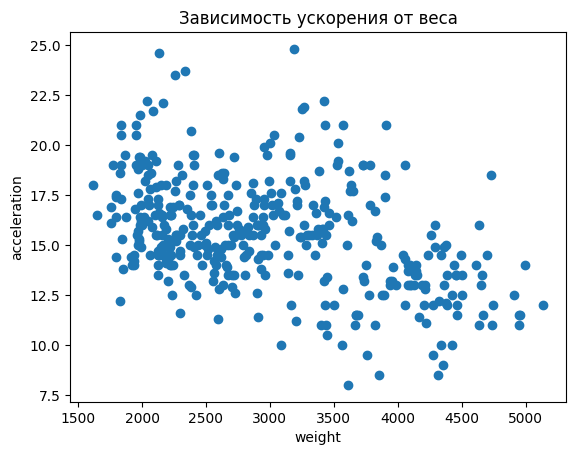

Коэффициент корреляции: -0.41745731994039326


In [82]:
# Гипотеза 1: Чем тяжелее машина, тем меньше ускорение

plt.scatter(df['weight'], df['acceleration'])
plt.xlabel('weight')
plt.ylabel('acceleration')
plt.title('Зависимость ускорения от веса')
plt.show()

corr = df[['weight', 'acceleration']].corr().iloc[0,1]
print('Коэффициент корреляции:', corr)



/var/folders/fd/qsm4vrx93kx9l3l9bdhfx7y80000gn/T/ipykernel_44839/2802284738.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([usa_hp, non_usa_hp], labels=['USA', 'non-USA'])


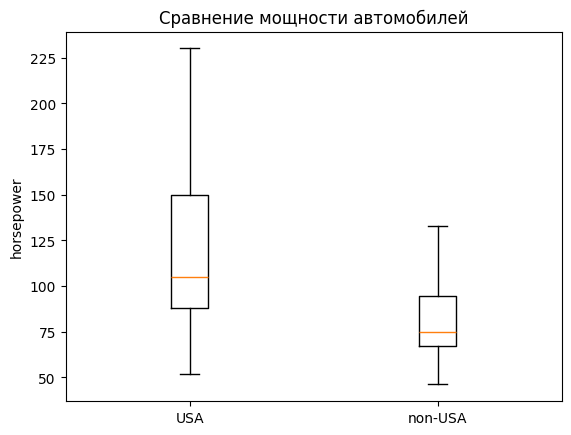

Средняя мощность USA: 119.04897959183674
Средняя мощность non-USA: 80.17006802721089


In [83]:
# Гипотеза 2: Машины из США обычно мощнее машин из не-США

df['is_usa'] = (df['origin'] == 'usa').astype(int)

usa_hp = df[df['is_usa'] == 1]['horsepower'].dropna()
non_usa_hp = df[df['is_usa'] == 0]['horsepower'].dropna()

plt.boxplot([usa_hp, non_usa_hp], labels=['USA', 'non-USA'])
plt.ylabel('horsepower')
plt.title('Сравнение мощности автомобилей')

plt.show()

print('Средняя мощность USA:', usa_hp.mean())
print('Средняя мощность non-USA:', non_usa_hp.mean())


## 4. Кодирование категориальных признаков

Для анализа использовалось бинарное кодирование признака `origin`:

* USA → 1
* не USA → 0




In [84]:
corr_df = df[['mpg', 'horsepower', 'weight']].corr()
corr_df

,mpg,horsepower,weight
mpg,1.000000,-0.778427,-0.831741
horsepower,-0.778427,1.000000,0.864538
weight,-0.831741,0.864538,1.000000


In [85]:
x = df[['weight']].dropna()
y = df.loc[x.index, 'mpg']

x = x.values.flatten()
y = y.values

x = (x - x.mean()) / x.std()
x

array([ 0.63086987,  0.85433297,  0.55047045,  0.54692342,  0.56584093,
        1.62049216,  1.63586264,  1.58620417,  1.71980909,  1.03996105,
        0.7006282 ,  0.75501604,  0.93473239,  0.1366499 , -0.70754402,
       -0.16248324, -0.23224156, -0.45333997, -0.99367137, -1.34246298,
       -0.35284069, -0.63896804, -0.70399699, -0.87070755, -0.38121696,
        1.94445453,  1.66187422,  1.66896828,  2.08278883, -0.99367137,
       -0.83523722, -0.87780162, -1.0929883 , -0.39776978,  0.55401749,
        0.4239596 ,  0.3920363 ,  0.37548348,  1.4644227 ,  1.76592053,
        1.39939375,  1.33081778,  2.34645164,  2.09934165,  2.56518536,
       -0.00996081, -0.66497962,  0.36838941,  0.19931416, -0.88726037,
       -1.00194778, -1.05988266, -1.07052376, -1.41576833, -1.60494344,
       -1.34364532, -1.20058165, -0.8186844 , -0.99840075, -0.84706066,
       -0.66497962, -0.88016631,  1.54127508,  1.67251532,  1.37692921,
        1.36983514,  0.82950374,  1.96573673,  1.81084961,  1.75

In [86]:
# Обычный градиентный спуск

w = 0.0
b = 0.0
lr = 0.01
n = len(x)

for _ in range(1000):
    y_pred = w * x + b
    dw = (-2/n) * np.sum(x * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)
    w -= lr * dw
    b -= lr * db

print('w:', w, 'b:', b)

w: -6.492702011751112 b: 23.514572824747354


In [87]:
# Стохастический градиентный спуск

w = 0.0
b = 0.0
lr = 0.01

for _ in range(20):
    for xi, yi in zip(x, y):
        y_pred = w * xi + b
        dw = -2 * xi * (yi - y_pred)
        db = -2 * (yi - y_pred)
        w -= lr * dw
        b -= lr * db

print('w:', w, 'b:', b)

w: -8.257964821093061 b: 26.595536446910668



## Итог

В работе выполнены все пункты задания:

* разведочный анализ
* проверка двух гипотез
* кодирование категориальных данных
* анализ корреляции
* ручная реализация GD и SGD